In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

([<matplotlib.axis.XTick at 0x265a8855160>,
 <a list of 2 Text xticklabel objects>)

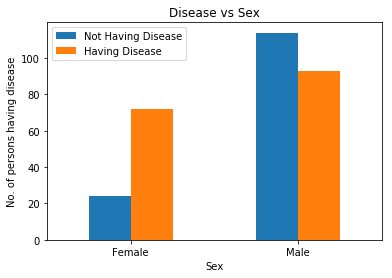

In [8]:
pd.crosstab(df.sex, df.target).plot(kind= 'bar')
plt.title('Disease vs Sex')
plt.legend(['Not Having Disease', 'Having Disease'])
plt.ylabel('No. of persons having disease')
plt.xlabel('Sex')
plt.xticks((0,1),['Female', 'Male'], rotation =0)

In [9]:
male_having_disease = (df.sex[(df.sex ==1) & (df.target ==1)].count()/df.sex[df.sex == 1].count()) * 100
female_having_disease = (df.sex[(df.sex ==0) & (df.target ==1)].count()/df.sex[df.sex == 0].count()) * 100
print('There are {}% male and {}% female having heart disease.'.format(male_having_disease, female_having_disease))

There are 44.927536231884055% male and 75.0% female having heart disease.


In [10]:
corrmat = df.corr()


In [11]:
corrmat

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [12]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


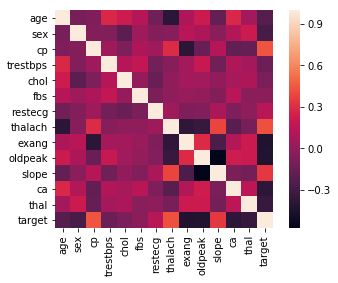

In [13]:
sns.heatmap(corrmat, vmax = 1, square=True)

In [14]:
df.thalach.describe()

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

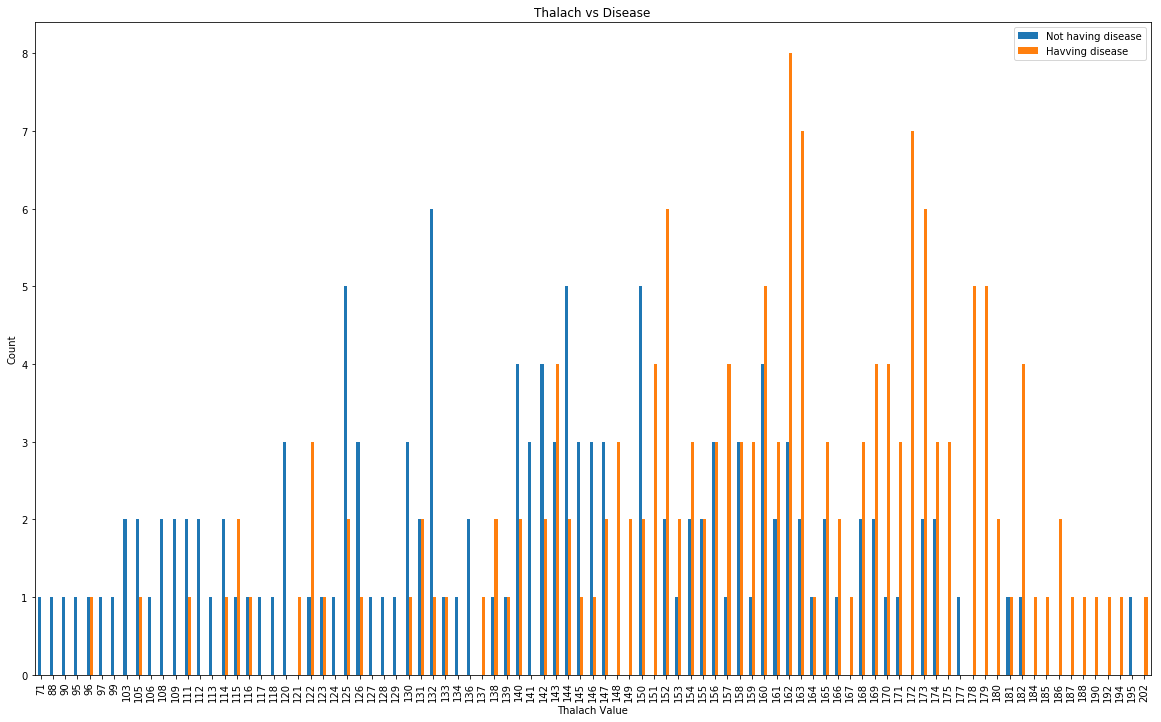

In [15]:
pd.crosstab(df.thalach, df.target).plot(kind = 'bar',figsize = (20,12))
plt.title('Thalach vs Disease')
plt.xlabel('Thalach Value')
plt.ylabel('Count')
plt.legend(['Not having disease', 'Havving disease'])
plt.show()

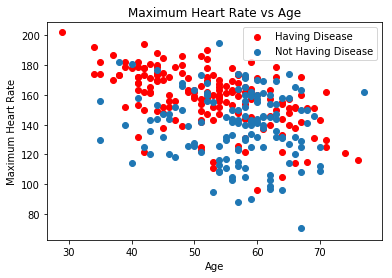

In [16]:
plt.scatter(df.age[df.target == 1], df.thalach[df.target == 1], c = 'red')
plt.scatter(df.age[df.target == 0], df.thalach[df.target == 0])
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.title('Maximum Heart Rate vs Age')
plt.legend(['Having Disease', 'Not Having Disease'])

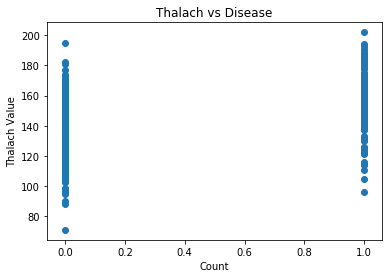

In [17]:
plt.scatter(df.target, df.thalach)
plt.title('Thalach vs Disease')
plt.ylabel('Thalach Value')
plt.xlabel('Count')
#plt.legend(['Not having disease', 'Havving disease'])
plt.show()

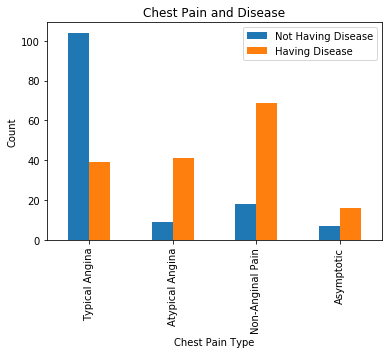

In [18]:
pd.crosstab(df.cp, df.target).plot(kind='bar')
plt.title('Chest Pain and Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(['Not Having Disease', 'Having Disease'])
plt.xticks((0,1,2,3), ['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptotic'], rotation=90)
plt.show()

In [19]:
chestpain = []
for i in range(0,4):
    chestpain.append((df.cp[(df.cp == i) & (df.target == 1)].count()/df.cp[df.cp == i].count())*100)

In [20]:
chestpain

[27.27272727272727, 82.0, 79.3103448275862, 69.56521739130434]

In [21]:
total_cp = []
for i in range(0,4):
    total_cp.append(df.cp[df.cp == i].count())

In [22]:
total_of_one_type = []
for i in range(0,4):
    total_of_one_type.append(df.cp[(df.cp == i) & (df.target == 1)].count())

In [23]:
CP = pd.DataFrame({'Total No.':total_cp,
                  'Total No. of certain type':total_of_one_type,
                  'Percentage':chestpain})

In [24]:
CP

,Total No.,Total No. of certain type,Percentage
0,143,39,27.272727
1,50,41,82.000000
2,87,69,79.310345
3,23,16,69.565217


In [25]:
ind = ['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptotic']
CP.set_index(pd.Index(ind), inplace=True)

In [26]:
CP

,Total No.,Total No. of certain type,Percentage
Typical Angina,143,39,27.272727
Atypical Angina,50,41,82.000000
Non-Anginal Pain,87,69,79.310345
Asymptotic,23,16,69.565217


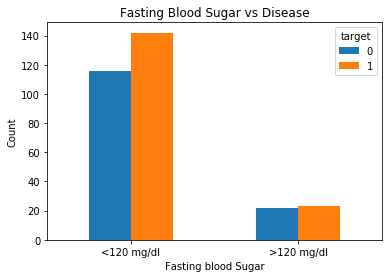

In [28]:
#FBS, Slope, 
#cp, thal, slope
pd.crosstab(df.fbs, df.target).plot(kind='bar')
plt.title('Fasting Blood Sugar vs Disease')
plt.xlabel('Fasting blood Sugar')
plt.ylabel('Count')
plt.xticks((0,1), ['<120 mg/dl', '>120 mg/dl'], rotation = 0)
plt.show()